In [67]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_rows", None)
pd.set_option("display.max_colwidth", None)

In [68]:
df_tables_daily = pd.read_csv("/home/danisan/sura/flujo_de_tablas/daily_tables.csv", delimiter=";")[["bbdd_tabla","ORIGEN","DESTINO"]]
df_tables_monthly = pd.read_csv("/home/danisan/sura/flujo_de_tablas/monthly_tables.csv", delimiter=";")[["bbdd_tabla","ORIGEN","DESTINO"]]

In [69]:
df_tables = pd.concat([df_tables_monthly, df_tables_daily], ignore_index=True)

In [70]:
df_tables_other_teams = df_tables[~df_tables["ORIGEN"].isin(df_tables["DESTINO"]) & ~df_tables["ORIGEN"].str.contains("#") & ~df_tables["ORIGEN"].str.contains("(BVP)|(MASTER)|(RSACLSF041)|(SGF1016)|(SGF1034)|(SGV1864)|(SOL)", regex=True)][["bbdd_tabla","ORIGEN"]]

df_tables_other_teams["SERVIDOR"] = df_tables_other_teams["bbdd_tabla"]

df_tables_external = df_tables[~df_tables["ORIGEN"].isin(df_tables["DESTINO"]) & ~df_tables["ORIGEN"].str.contains("#") & ~df_tables["ORIGEN"].str.contains("(ALMACEN_DE_DATOS)|(CANAL_ASESOR)|(PROCESOS)|(REPORTES)|(TABLAS_COMPARTIDAS)|(TRANSACCIONAL)", regex=True)][["bbdd_tabla","ORIGEN"]]

df_tables_external["SERVIDOR"] = df_tables_external["bbdd_tabla"]

/tmp/ipykernel_22043/4084820401.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_tables_other_teams = df_tables[~df_tables["ORIGEN"].isin(df_tables["DESTINO"]) & ~df_tables["ORIGEN"].str.contains("#") & ~df_tables["ORIGEN"].str.contains("(BVP)|(MASTER)|(RSACLSF041)|(SGF1016)|(SGF1034)|(SGV1864)|(SOL)", regex=True)][["bbdd_tabla","ORIGEN"]]
/tmp/ipykernel_22043/4084820401.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_tables_external = df_tables[~df_tables["ORIGEN"].isin(df_tables["DESTINO"]) & ~df_tables["ORIGEN"].str.contains("#") & ~df_tables["ORIGEN"].str.contains("(ALMACEN_DE_DATOS)|(CANAL_ASESOR)|(PROCESOS)|(REPORTES)|(TABLAS_COMPARTIDAS)|(TRANSACCIONAL)", regex=True)][["bbdd_tabla","ORIGEN"]]


In [71]:
df_servers_external_consolidate = df_tables_external.groupby(by="SERVIDOR").size().to_frame().rename(columns={0: "n_consultas"}).sort_values(by="n_consultas", ascending=False).reset_index()

In [72]:
df_tables_external_consolidate = df_tables_external.groupby(by=["bbdd_tabla","ORIGEN"]).size().to_frame().rename(columns={0: "n_consultas"}).sort_values(by=["n_consultas"], ascending=[False]).reset_index()

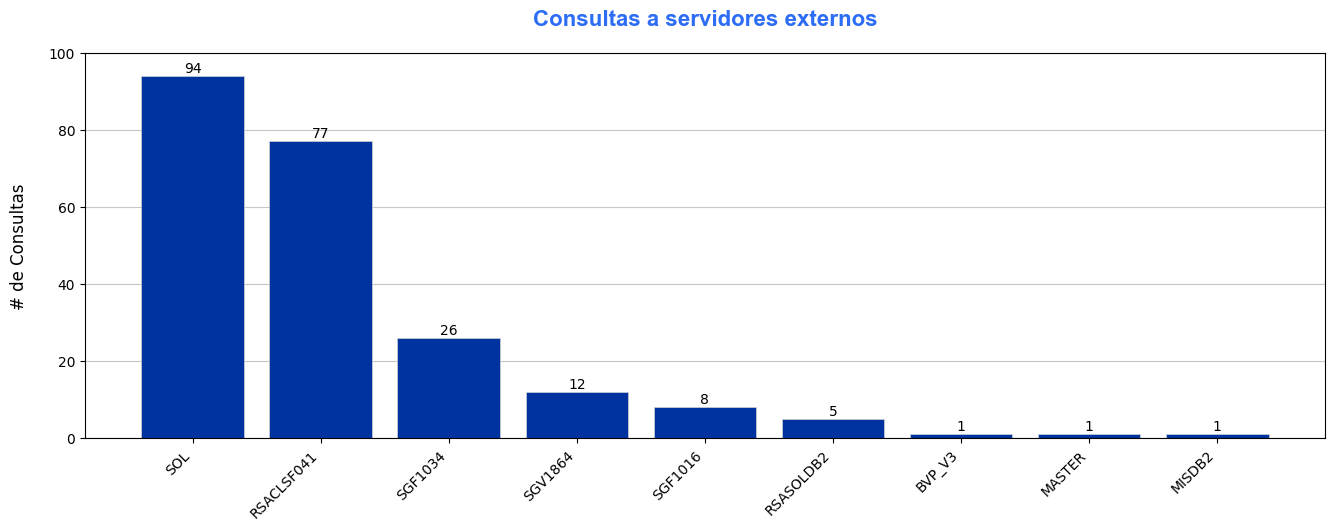

In [73]:
plt.figure(figsize=(16, 5))
plt.gca().set_axisbelow(True)
plt.bar(df_servers_external_consolidate[df_servers_external_consolidate["n_consultas"] > 0]["SERVIDOR"], df_servers_external_consolidate[df_servers_external_consolidate["n_consultas"] > 0]["n_consultas"], color = (0/255, 51/255, 160/255), edgecolor = "lightgray", linewidth = 0.5)

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.title("Consultas a servidores externos", fontsize = 16, pad = 20, color = (45/255, 109/255, 246/255), fontweight = "bold", fontname = "Arial")

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 100)
plt.ylabel("# de Consultas", fontsize = 12, labelpad = 15)


for i, v in enumerate(df_servers_external_consolidate[df_servers_external_consolidate["n_consultas"] > 0]["n_consultas"]):
    plt.text(i, v + 1, str(v), ha='center')

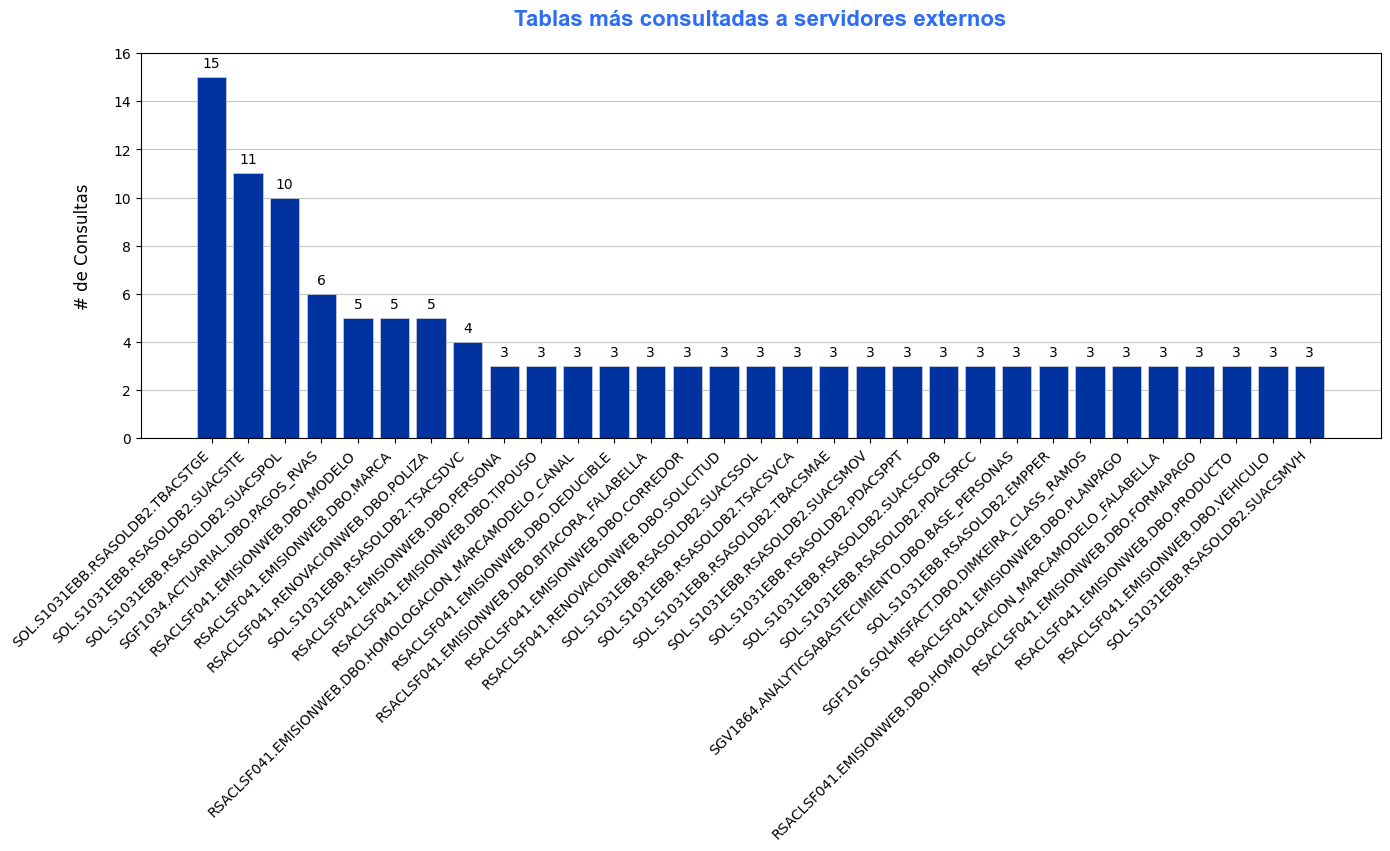

In [74]:
plt.figure(figsize=(16, 5))
plt.gca().set_axisbelow(True)
plt.bar(df_tables_external_consolidate[df_tables_external_consolidate["n_consultas"] >= 3]["ORIGEN"], df_tables_external_consolidate[df_tables_external_consolidate["n_consultas"] >= 3]["n_consultas"], color = (0/255, 51/255, 160/255), edgecolor = "lightgray", linewidth = 0.5)

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.title("Tablas más consultadas a servidores externos", fontsize = 16, pad = 20, color = (45/255, 109/255, 246/255), fontweight = "bold", fontname = "Arial")

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 16)
plt.ylabel("# de Consultas", fontsize = 12, labelpad = 15)


for i, v in enumerate(df_tables_external_consolidate[df_tables_external_consolidate["n_consultas"] >= 3]["n_consultas"]):
    plt.text(i, v + 0.4, str(v), ha='center')

Estas son tablas de origen exclusivamente de servidores externos, ya que tenemos conexiones con tablas generadas por otros equipos.

In [75]:
df_servers_internal_consolidate = df_tables_other_teams.groupby(by="SERVIDOR").size().to_frame().rename(columns={0: "n_consultas"}).sort_values(by="n_consultas", ascending=False).reset_index()

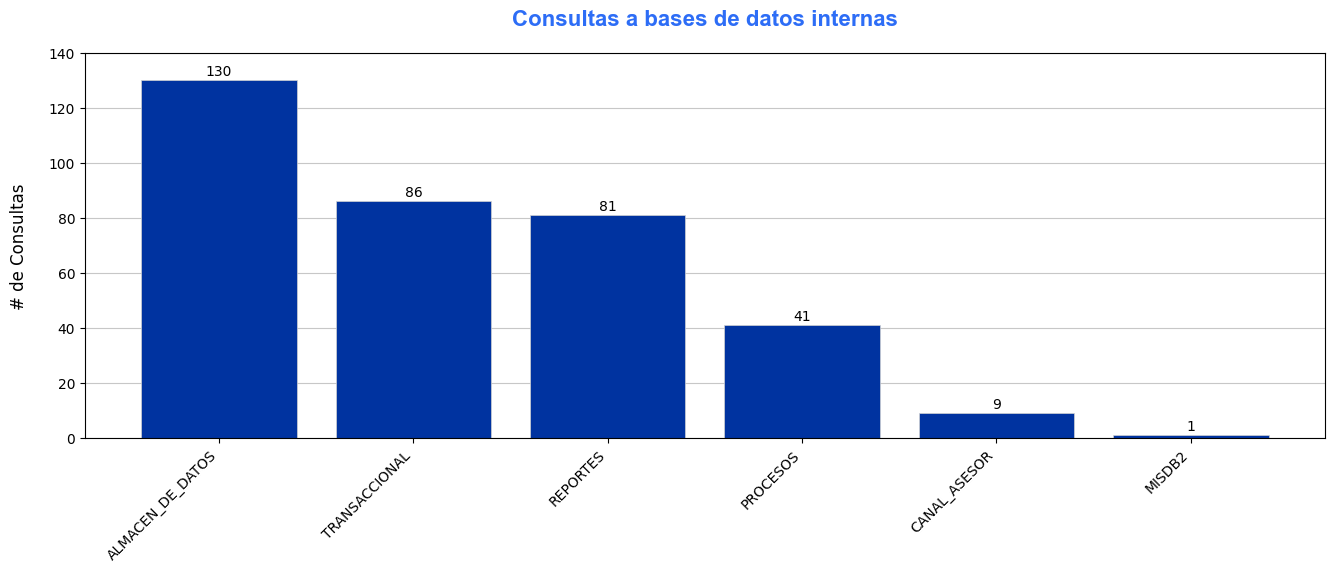

In [85]:
plt.figure(figsize=(16, 5))
plt.gca().set_axisbelow(True)
plt.bar(df_servers_internal_consolidate[df_servers_internal_consolidate["n_consultas"] > 0]["SERVIDOR"], df_servers_internal_consolidate[df_servers_internal_consolidate["n_consultas"] > 0]["n_consultas"], color = (0/255, 51/255, 160/255), edgecolor = "lightgray", linewidth = 0.5)

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.title("Consultas a bases de datos internas", fontsize = 16, pad = 20, color = (45/255, 109/255, 246/255), fontweight = "bold", fontname = "Arial")

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 140)
plt.ylabel("# de Consultas", fontsize = 12, labelpad = 15)


for i, v in enumerate(df_servers_internal_consolidate[df_servers_internal_consolidate["n_consultas"] > 0]["n_consultas"]):
    plt.text(i, v + 2, str(v), ha='center')

In [77]:
df_tables_internal_consolidate = df_tables_other_teams.groupby(by=["bbdd_tabla","ORIGEN"]).size().to_frame().rename(columns={0: "n_consultas"}).sort_values(by=["n_consultas"], ascending=[False]).reset_index()

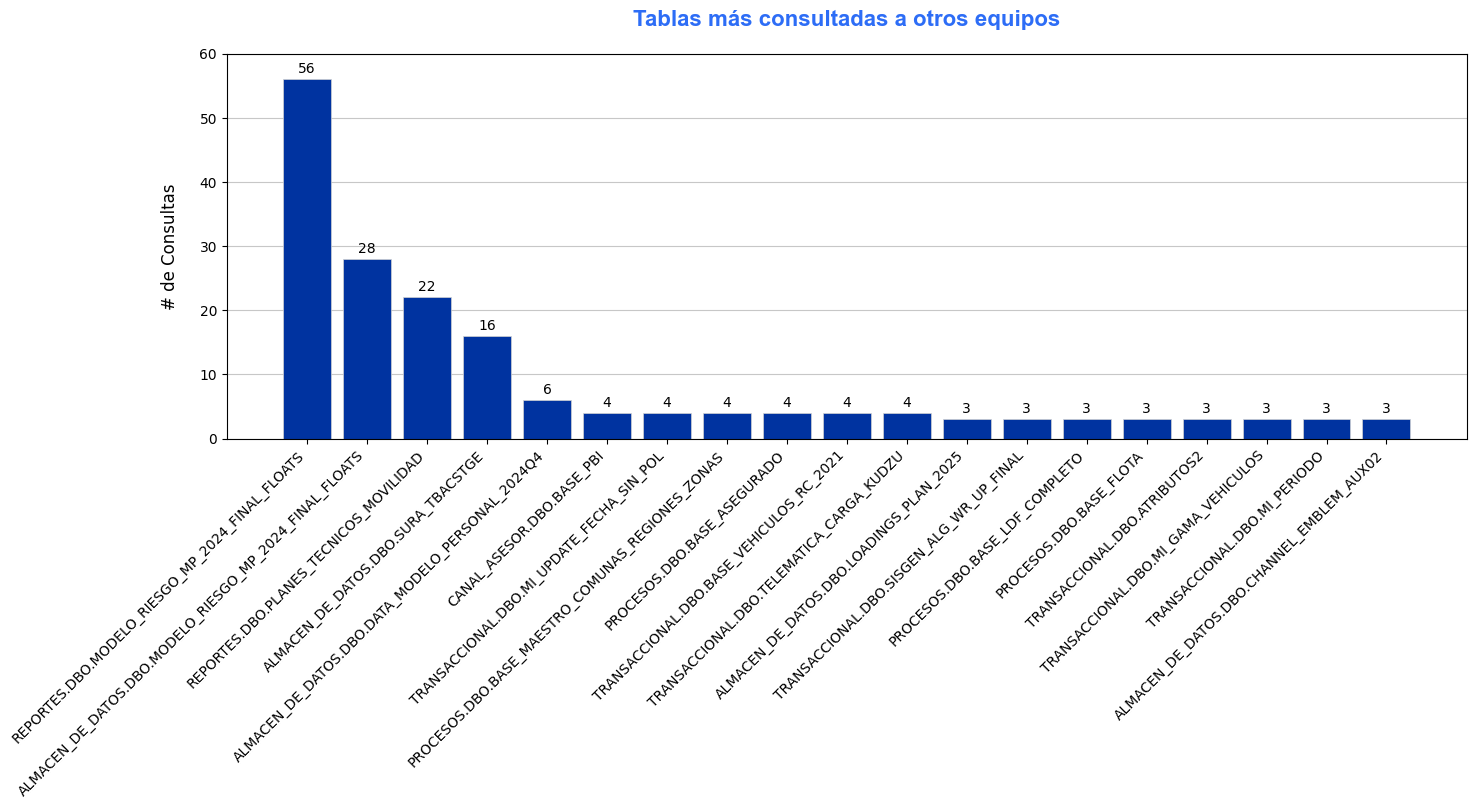

In [86]:
plt.figure(figsize=(16, 5))
plt.gca().set_axisbelow(True)
plt.bar(df_tables_internal_consolidate[df_tables_internal_consolidate["n_consultas"] >= 3]["ORIGEN"], df_tables_internal_consolidate[df_tables_internal_consolidate["n_consultas"] >= 3]["n_consultas"], color = (0/255, 51/255, 160/255), edgecolor = "lightgray", linewidth = 0.5)

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.title("Tablas más consultadas a otros equipos", fontsize = 16, pad = 20, color = (45/255, 109/255, 246/255), fontweight = "bold", fontname = "Arial")

plt.xticks(rotation=45, ha="right")
plt.ylim(0, 60)
plt.ylabel("# de Consultas", fontsize = 12, labelpad = 15)


for i, v in enumerate(df_tables_internal_consolidate[df_tables_internal_consolidate["n_consultas"] >= 3]["n_consultas"]):
    plt.text(i, v + 1, str(v), ha='center')

In [79]:
df_output_tables = df_tables[~df_tables["DESTINO"].str.contains("#")]

In [80]:
last_table = ""
output_tables = set()
for i, dest_table in enumerate(df_output_tables["DESTINO"]):
    if dest_table not in df_output_tables["ORIGEN"].iloc[0:i].tolist():
        if last_table != dest_table:
            output_tables.add(dest_table)
            last_table = dest_table

In [81]:
df_tables_produced = pd.DataFrame(output_tables).rename(columns={0: "Tabla"})

df_tables_produced["BBDD"] = df_tables_produced["Tabla"].str.extract("(^[A-Za-z0-9_]+)")

df_tables_produced = df_tables_produced[["BBDD","Tabla"]]

In [82]:
df_tables_produced_count = df_tables_produced.groupby("BBDD").count().reset_index().rename(columns={"Tabla" : "Cantidad de tablas"})

In [83]:
df_tables_produced_count

,BBDD,Cantidad de tablas
0,ALMACEN_DE_DATOS,70
1,CANAL_ASESOR,2
2,PROCESOS,5
3,REPORTES,20
4,TABLAS_COMPARTIDAS,2
5,TRANSACCIONAL,70


In [84]:
df_tables_produced.sort_values(by="BBDD").reset_index(drop=True)

,BBDD,Tabla
0,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SURA_MOVILIDAD_CONTINUIDAD_COBERTURA
1,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SURA_CIERRE_MES
2,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SURA_DESCUENTO_RENOVACION
3,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SURA_MOVILIDAD_SINIESTROS_A3_COMPLETO_FINAL
4,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SURA_SEGMENTACION_CLINETE
5,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SORS_PR_COTIS_DIRECTO_PYME_ASESOR
6,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.PBI_APTP_NEW_FIV_NM2024
7,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SURA_PAGOS_RESERVAS
8,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SURA_USUARIO_FIRMA
9,ALMACEN_DE_DATOS,ALMACEN_DE_DATOS.DBO.SURA_MOVILIDAD_SINIESTROS_PAGOS_RESERVAS


Si es que una tabla no aparece antes de la línea en cuestión de la query en forma de **ORIGEN**, significa que es una tabla generada por nosotros, ya sea que se borra e insertan datos, se actualiza o se trunca.